In [4]:
library("readxl")
library(rvest) # scrap web pages
library(reticulate)  # R & python interchange
library(tidyverse)
library(tictoc)

Writing Data To File will be In Parallel to data processing <br/>
Cell for writing will have the comment 'to file'

In [108]:
# to file
# initializing the file, erases any existing content
fileConn<-file("output/main.tex")
line= "\\title{Summary Of Scientific Data}
\\author{
        Randy Quindai \\\\
                Computing Institute\\\\
        PPGI---Master of Informatics\\\\
        Federal University of Alagoas, \\underline{AC Simões}\\\\ Brazil 
}
\\date{\\today}
"
write(line,file=fileConn,append=FALSE)
close(fileConn)

In [109]:
# to file
line="
\\documentclass[12pt]{article}

\\begin{document}
\\maketitle
"
write(line,file="output/main.tex",append=TRUE)

## Import BIB data
- https://bibliometrix.org/documents/bibliometrix_Report.html
- Place your bibtex files in bibs folder

In [21]:
# Reading Bibtex
# assuming that you are in the same directory as this snippet
library(bibliometrix)
bibs <- list.files("bibs/", pattern = "bib$", recursive = T, full.names = T)
bibs # visualize the files, index start at 1

[1] "bibs//cochrane.bib"  "bibs//savedrecs.bib" "bibs//scopus.bib"

In [ ]:
M <- convert2df(file=bibs[2], dbsource = "isi", format = "bibtex")

See Bibliometrix for more details

## Import xlsx data
File extracted from StArt Tool after selection of savedrecs.bib <br/>
This is our input data

In [58]:
my_data <- read_excel("bibs/arquivos.xlsx")
sub_data <- my_data[my_data$`Status/Selection` == "ACCEPTED",]
names(sub_data) # visualize columns names

New names:
* `` -> ...21
* `` -> ...38
* `` -> ...46



[1] "ID Paper"                                     
 [2] "Title"                                        
 [3] "ID Search Session"                            
 [4] "Authors"                                      
 [5] "Abstract"                                     
 [6] "Status/Selection"                             
 [7] "Status/Extraction"                            
 [8] "Reading Priority"                             
 [9] "Score"                                        
[10] "Year"                                         
[11] "Journal"                                      
[12] "Keywords"                                     
[13] "Type"                                         
[14] "comment"                                      
[15] "URL"                                          
[16] "Volume"                                       
[17] "Pages"                                        
[18] "DOI"                                          
[19] "ISSN/ISBN"                                    
[20] "Importation Date"                             
[21] "...21"                                        
[22] "(I) Primary Sources"                          
[23] "(I) Code Generators"                          
[24] "(I) Component-based Frameworks for IoT"       
[25] "(I) Journal Article"                          
[26] "(I) Gamification on IoT"                      
[27] "(I) VPL for IoT"                              
[28] "(I) Embedded Communication"                   
[29] "(E) Short-Paper"                              
[30] "(E) Conference call"                          
[31] "(E) Paper not Available for Extraction"       
[32] "(E) Gray Literature"                          
[33] "(E) Similar paper of the same author"         
[34] "(E) Proceedings or Conference Article"        
[35] "(E) Non IoT Coding Context"                   
[36] "(E) Component or Framework in Non IoT Context"
[37] "(E) Secondary Sources"                        
[38] "...38"                                        
[39] "Context : Web"                                
[40] "Context : Desktop}"                           
[41] "Proposal : Seminal"                           
[42] "Proposal : not Seminal}"                      
[43] "Contribution : Framework"                     
[44] "Contribution : Component Based"               
[45] "Contribution : Formal}"                       
[46] "...46"                                        
[47] "QA1 : 10"                                     
[48] "QA1 : 20"                                     
[49] "QA1 : 30"                                     
[50] "QA1 : 40"                                     
[51] "QA1 : 50"                                     
[52] "QA1 : 60"                                     
[53] "QA1 : 70"                                     
[54] "QA1 : 80"                                     
[55] "QA1 : 90"                                     
[56] "QA1 : 100}"

In [110]:
# to file
line="\\begin{abstract}
Data imported from \\em{bibs/arquivos.xlsx}. Mean of not available values: 
"
write(line,file="output/main.tex",append=TRUE)

In [111]:
# to file
line=mean(rowMeans(is.na(sub_data))*length(sub_data))
write(line,file="output/main.tex",append=TRUE)

In [112]:
# to file
line="\\end{abstract}"
write(line,file="output/main.tex",append=TRUE)

In [113]:
# to file
line="\\section{Introduction}
\\label{sec:introduction}
Please cite Quindai~\\cite{quindai2020slr}!"
write(line,file="output/main.tex",append=TRUE)

In [114]:
# to file
# bibliography
line="\\bibliographystyle{abbrv}
\\bibliography{main}
\\end{document}"
write(line,file="output/main.tex",append=TRUE)

# Manipulating the data
This section depicts the two techniques compared in this work. <br/>
LDA vs Our proposal

Links
- https://cran.r-project.org/web/packages/tidytext/vignettes/tidying_casting.html

In [59]:
# create new column combining title, abstract and keywords
sub_data <- sub_data %>%
mutate(fog = paste(sub_data$Title, sub_data$Abstract, sub_data$Keywords))

In [60]:
# capture only these columns
temp_subdata <- sub_data %>%
select (Title, DOI, Year, fog)

### LDA Topic Modeling

In [83]:
# transform column fog to Document term matrix
library(quanteda)
data.dtm <- corpus(temp_subdata, text_field = "fog")
data.dtm <- dfm(data.dtm, remove_punct = TRUE) %>%
  dfm_remove(stopwords("en"))
data.dtm

Document-feature matrix of: 204 documents, 7,241 features (98.7% sparse) and 3 docvars.
       features
docs    high-level modeling toward efficient trustworthy circuits
  text1          1        1      1         2           1        1
  text2          0        0      0         0           0        0
  text3          0        1      0         0           0        0
  text4          0        0      0         0           0        0
  text5          0        0      0         0           0        0
  text6          0        0      0         0           0        0
       features
docs    behavior-interaction-priority bip layered embedded
  text1                             1   3       1        1
  text2                             0   0       0        0
  text3                             0   0       0        4
  text4                             0   0       0        2
  text5                             0   0       0        0
  text6                             0   0       0        0
[ rea

In [84]:
library(tidytext)
data.dtm <- tidy(data.dtm) %>% cast_dtm(document, term, count)

In [85]:
# issue: rstudio 4 https://github.com/rstudio/rstudio/issues/6692
library(ldatuning)
library(topicmodels)
tunningresult <- FindTopicsNumber(
data.dtm,
topics = seq(from = 2, to = 20, by = 1),
metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010", "Deveaud2014"),
method = "Gibbs",
control = list(seed = 77),
mc.cores = 2L,
verbose = TRUE)

fit models... done.
calculate metrics:
  Griffiths2004... done.
  CaoJuan2009... done.
  Arun2010... done.
  Deveaud2014... done.


You can run this snnipet as many times as you’d like, varying the number of CPU cores to suit your needs.

Observe carefully the graph above, it suggests a model with k between 16 and 19, we’ll choose k=17

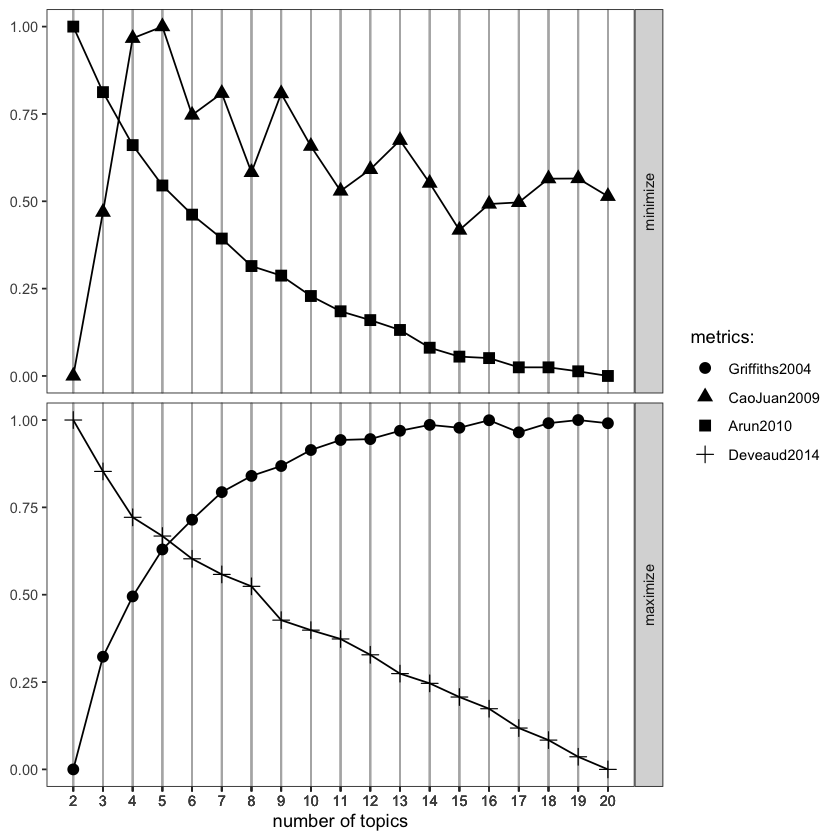

In [88]:
FindTopicsNumber_plot(tunningresult)

Observe the value of k and the method used, you have two options (VEM or Gibbs)
matrix Whether to tidy the beta (per-term-per-topic, default) or gamma (per-document-per-topic) matrix

In [87]:
data.dtm.lda <- LDA(data.dtm, k=17, control=list(seed=77), method="Gibbs")
data.dtm.topics <- tidy(data.dtm.lda, matrix = "beta")
# optional: to visualize the data uncomment below
#data.dtm.topics

In [77]:
data.dtm.top_terms <- data.dtm.topics %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup %>%
  arrange(topic, -beta)
# optional: to visualize the data uncomment below
#data.dtm.top_terms

In [24]:
p <- data.dtm.top_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill=factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()
p

ERROR: Error in eval(lhs, parent, parent): object 'data.dtm.top_terms' not found


In [109]:
# optional: save to disc
ggsave("mtm.pdf",
  plot = p,
  device = "pdf",
  path = NULL,
  scale = 1,
  width = 15,
  height = NA,
  units = c("in", "cm", "mm"),
  dpi = 320,
  limitsize = TRUE,)

Saving 15 x 7 in image



In [111]:
data.dtm.gamma <- tidy(data.dtm.lda, matrix = "gamma")

#plot data factor topic
p1 <- data.dtm.gamma %>%
  mutate(title = reorder(document, gamma * topic)) %>%
  ggplot(aes(factor(topic), gamma)) +
  geom_boxplot() +
  facet_wrap(~ title)
p1

### Our proposal

#### Grouping and Clustering With Spacy
- https://spacy.io - substantive subordinate operations
- GPT2 Google Colab - https://colab.research.google.com/drive/1IkkaegqKXYPhnN_xoKMY-36gNaXw_092?usp=sharing


Steps:
* Extração de chunks das sentenças reais (classificador Spacy, ler artigo)
* Remoção de Stopwords usando o pacote do Spacy
* Remoção customizada de expressões não desejadas
* Remoção de expressões com uma única palavra
* Stemming das expressões
* Extração dos grupos de artigos

In [61]:
spacy = import("spacy")
nlp = spacy$load('en_core_web_sm')

In [62]:
tic("Spacy Begin")
all_data = tibble()
index <- 1
for(data in temp_subdata$fog){
    doc = nlp(data)
    # retificacao de palavras com hifen
    py_run_string("
clean_doc = ''
for word in r.doc:
    if word.is_stop==False:
        if word.text=='-':
            clean_doc=clean_doc[:-1] + word.text + ''
        else:
            clean_doc=clean_doc + word.text + ' '")
    doc = nlp(py$clean_doc)
    py_run_string("chunks = [chunk.text for chunk in r.doc.noun_chunks]")
    #print(py$chunks)
    #chunks = [chunk.text for chunk in r.doc.noun_chunks]
    temp = tibble(Title=temp_subdata[index, 1], 
           DOI=temp_subdata[index, 2], 
           Year=temp_subdata[index, 3],
           fog=temp_subdata[index, 4],
           Categ=py$chunks) %>%
        mutate(Categ = map(Categ, as_tibble)) %>% # prepara para o unnest
        unnest(cols=c(Title, DOI, Year, fog, Categ)) # separa cada termo em uma linha diferente
    index <- index+1
    all_data <- bind_rows(all_data, temp %>%
        distinct(value, .keep_all=TRUE))}
toc()

Spacy Begin: 39.261 sec elapsed


In [11]:
all_data

Title,DOI,Year,fog,value
<chr>,<chr>,<chr>,<chr>,<chr>
From high-level modeling toward efficient and trustworthy circuits,10.1007/s10009-017-0462-5,2019,"From high-level modeling toward efficient and trustworthy circuits Behavior-interaction-priority (BIP) is a layered embedded system designand verification framework that provides separation of functionality,synchronization, and priority concerns to simplify system design and toestablish correctness by construction. BIP framework comes with aruntime engine and a suite of verification tools that use D-Finder andNuSMV as model-checkers. In this paper, we provide a method and asupporting tool that take a BIP system and a set of invariants andcompute a reduced sequential circuit with a system-specific schedulerand a designated output that is true when the invariants hold. Ourmethod uses ABC, a sequential circuit synthesis and verificationframework, to (1) generate an efficient circuit implementation of thesystem that can be readily translated into FPGA or ASIC implementationsand to (2) verify the system and debug it in case a counterexample isfound. Moreover, we generate a concurrent C implementation of thecircuit that can be directly used for runtime verification. We evaluatedour method with two benchmark systems, and our results show that,compared to existing techniques, our method is faster and scales tolarger sizes. Component-based design; Correct-by-construction; FPGA; Verification",high-level modeling efficient trustworthy circuits
From high-level modeling toward efficient and trustworthy circuits,10.1007/s10009-017-0462-5,2019,"From high-level modeling toward efficient and trustworthy circuits Behavior-interaction-priority (BIP) is a layered embedded system designand verification framework that provides separation of functionality,synchronization, and priority concerns to simplify system design and toestablish correctness by construction. BIP framework comes with aruntime engine and a suite of verification tools that use D-Finder andNuSMV as model-checkers. In this paper, we provide a method and asupporting tool that take a BIP system and a set of invariants andcompute a reduced sequential circuit with a system-specific schedulerand a designated output that is true when the invariants hold. Ourmethod uses ABC, a sequential circuit synthesis and verificationframework, to (1) generate an efficient circuit implementation of thesystem that can be readily translated into FPGA or ASIC implementationsand to (2) verify the system and debug it in case a counterexample isfound. Moreover, we generate a concurrent C implementation of thecircuit that can be directly used for runtime verification. We evaluatedour method with two benchmark systems, and our results show that,compared to existing techniques, our method is faster and scales tolarger sizes. Component-based design; Correct-by-construction; FPGA; Verification",Behavior-interaction-priority
From high-level modeling toward efficient and trustworthy circuits,10.1007/s10009-017-0462-5,2019,"From high-level modeling toward efficient and trustworthy circuits Behavior-interaction-priority (BIP) is a layered embedded system designand verification framework that provides separation of functionality,synchronization, and priority concerns to simplify system design and toestablish correctness by construction. BIP framework comes with aruntime engine and a suite of verification tools that use D-Finder andNuSMV as model-checkers. In this paper, we provide a method and asupporting tool that take a BIP system and a set of invariants andcompute a reduced sequential circuit with a system-specific schedulerand a designated output that is true when the invariants hold. Ourmethod uses ABC, a sequential circuit synthesis and verificationframework, to (1) generate an efficient circuit implementation of thesystem that can be readily translated into FPGA or ASIC implementationsand to (2) verify the system and debug it in case a counterexample isfound. 

In [63]:
all_data$value_low <- sapply(all_data$value, tolower)

In [64]:
library(SnowballC)
all_data <- all_data %>%
mutate(value_stem = wordStem(value_low, language = "english"))

`summarise()` ungrouping output (override with `.groups` argument)



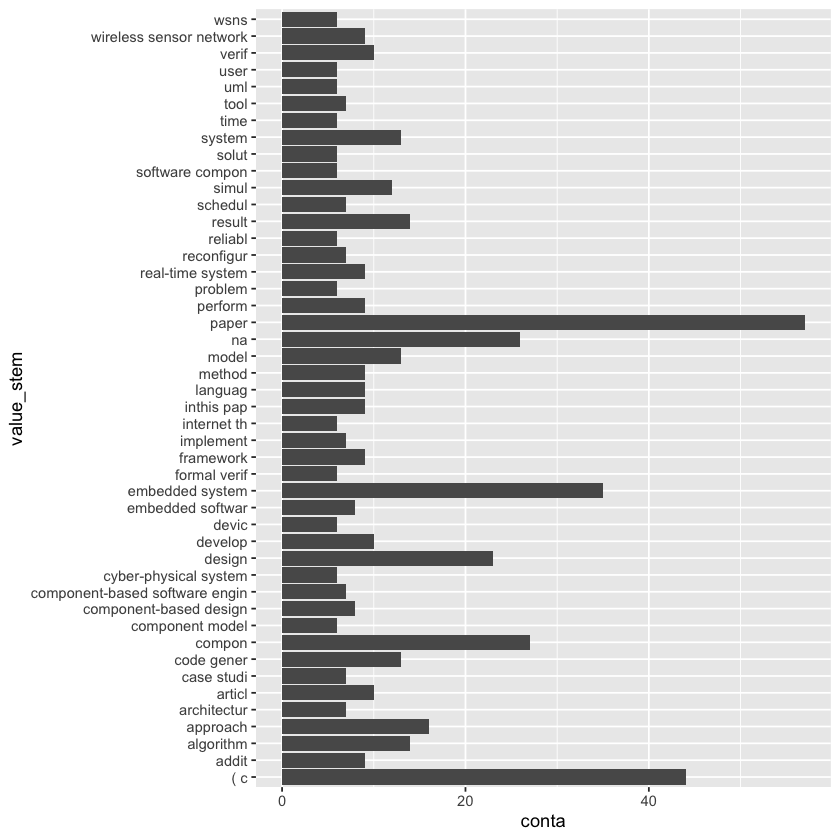

In [71]:
# Visualize 
# WARNING: before removal of unwanted
p <- all_data %>%
group_by(value_stem) %>% # agrupa os termos
summarise(conta = n()) %>% # conta a quantidade de vezes que cada palavra aparece
filter(conta > 5) %>% # palavras que aparecem em pelo menos 30 documentos
ggplot(aes(x=value_stem, y = conta)) +
geom_bar(stat="identity") +
theme(axis.text.x=element_text(hjust = .5)) +
coord_flip()
p

In [18]:
temp = all_data %>%
group_by(value_stem) %>%
summarise(conta = n()) %>%
arrange(desc(conta))

`summarise()` ungrouping output (override with `.groups` argument)



In [19]:
temp # visualize the groups

value_stem,conta
<chr>,<int>
paper,57
( c,44
embedded system,35
compon,27
na,26
design,23
approach,16
algorithm,14
result,14


In [50]:
# custom removal of not wanted groups
unWantedTerms <- c('( c', 'na', '2008 elsevierb.v. right','elsevier b.v.', 'elsevier b.v. right', 'elsevier inc. right', 'inthis pap', 'elsevier b.v. allright', 'elsevier b.v.all right', 'elsevierb.v. right')

In [51]:
# function -> erase from mylist a vector with column value_stem, 
#             erases groups with one word only
delSingleWord <- function(mylist, customTerms=NULL){
    return (mylist %>%
        filter(sapply(strsplit(value_stem, " "), length) > 1) %>%
        filter(!value_stem %in% customTerms)
    )
}

In [52]:
temp <- delSingleWord(temp, unWantedTerms)
temp

value_stem,conta
<chr>,<int>
embedded system,35
code gener,13
real-time system,9
wireless sensor network,9
component-based design,8
embedded softwar,8
case studi,7
component-based software engin,7
component model,6


### Extract studies from all groups, starting from most frequent groups to least

In [53]:
selecionados_temp <- list()
artigos_ <- c()
temp_subdata_ = all_data
idx <- 1
while(nrow(temp_subdata_) > 0){  # enquanto existirem artigos, resgatar
    selecionados_temp[[idx]] <- temp_subdata_ %>% 
                # resgata registro de todas as palavras iguais a palavra temp atual
                filter(value_stem %in% temp$value_stem[idx]) %>% # use var temp
                filter(!duplicated(Title)) # elimina duplicados
    artigos_ <- c(artigos_, selecionados_temp[[idx]]$Title)
    temp_subdata_ = temp_subdata_ %>% filter(!Title %in% artigos_)
    #temp_subdata_ <- temp_subdata_ %>% filter(!Title %in% selecionados_temp[[if(idx==1) 1 else idx-1]]$Title)
    idx <- idx + 1
    
    #print(paste("ITERACAO ",idx-1))
    #print(length(temp_subdata_))
}                                                                          
remove(temp_subdata_)

In [54]:
# clear all null lists 
j<-1
selecionados <- list()
for(i in 1:length(selecionados_temp)){
    if(nrow(selecionados_temp[[i]]) > 0){
        selecionados[[j]] <- selecionados_temp[[i]]
        j<-j+1
    }
}

In [55]:
# visualize a selected group
selecionados %>% map_df(~ .x %>% 
                    filter(value_low %in% "embedded systems")) 

Title,DOI,Year,fog,value,value_low,value_stem
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Component-Based Synthesis of Embedded Systems Using SatisfiabilityModulo Theories,10.1145/2746235,2015,"Component-Based Synthesis of Embedded Systems Using SatisfiabilityModulo Theories Constraint programming solvers, such as Satisfiability Modulo Theory(SMT) solvers, are capable tools in finding preferable configurationsfor embedded systems from large design spaces. However, constructing SMTconstraint programs is not trivial, in particular for complex systemsthat exhibit multiple viewpoints and models. In this article we proposeCoDeL: a component-based description language that allows systemdesigners to express components as reusable building blocks of thesystem with their parameterizable properties, models, andinterconnectivity. Systems are synthesized by allocating, connecting,and parameterizing the components to satisfy the requirements of anapplication. We present an algorithm that transforms component-baseddesign spaces, expressible in CoDeL, to an SMT program, which, solved bystate-of-the-art SMT solvers, determines the satisfiability of thesynthesis problem, and delivers a correct-by-construction systemconfiguration. Evaluation results for use cases in the domain ofscheduling and mapping of distributed real-time processes confirm,first, the performance gain of SMT compared to traditional design spaceexploration approaches, second, the usability gains by expressing designproblems in CoDeL, and third, the capability of the CoDeL/SMT approachto support the design of embedded systems. Design; Embedded systems; components; satisfiability modulo theory;design space exploration; systems specification methodology; modeling",Embedded systems,embedded systems,embedded system
Automatic synthesis of communication and concurrency for exploringcomponent-based system implementations considering UML channel semantics,10.1016/j.sysarc.2015.07.002,2015,"Automatic synthesis of communication and concurrency for exploringcomponent-based system implementations considering UML channel semantics Nowadays, multi-processor systems play a critical role in embeddedsystem engineering. As a result, the generation of optimal concurrentimplementations is an unavoidable but difficult task. Correct concurrentcodes achieving maximum performance on the target platform are hard toobtain. On the one hand, dependencies on concurrent computations, suchas shared variables or synchronizations, are extremely difficult toanalyze from source code. On the other hand, it is completely unfeasiblefor designers to manually generate multiple implementations in order toevaluate and compare all the possible design alternatives. To overcomethese limitations, this paper presents an automatic code generationapproach focusing on communication channel semantics. The approachproposes the use of UML/MARTE models to enable designers to graphicallyhandle dependencies and concurrency of the models. As a result, theautomatic generation process enables multiple design alternatives to beeasily obtained and evaluated without adding manual effort to the designprocess. To demonstrate these capabilities, the methodology is testedwith two large examples. (C) 2015 Elsevier B.V. All rights reserved. UML; Embedded systems; Automatic synthesis; Communication semantics",Embedded systems,embedded systems,embedded system
DREMS ML: A wide spectrum architecture design language for distributedcomputing platforms,10.1016/j.scico.2015.04.002,2015,"DREMS ML: A wide spectrum architecture design language for distributedcomputing platforms Complex sensing, processing and control applications running ondistributed platforms are difficult to design, develop, analyze,integrate, deploy and operate, especially if resource constraints, faulttolerance and security issues are to be addressed. While technologyexists today for engineering distributed, real-time component-basedapplications, many problems remain unsolved by exist

In [34]:
selecionados

Title,DOI,Year,fog,value,value_low,value_stem
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Software Requirement Specification Based on a Gray Box for EmbeddedSystems: A Case Study of a Mobile Phone Camera Sensor Controller,10.3390/computers8010020,2019,"Software Requirement Specification Based on a Gray Box for EmbeddedSystems: A Case Study of a Mobile Phone Camera Sensor Controller One of the most widely used models for specifying functionalrequirements is a use case model. The viewpoint of the use case modelthat views a system as a black box focuses on descriptions of externalinteractions between the system and related environments. However, forembedded systems that do not disclose most implementation logics outsidethe system, black box-based use case models may experience the drawbackthat considerable information that must be defined for systemdevelopments is omitted. To solve this shortcoming, several studies havebeen proposed on the use of kind of white box technique in which thedynamic behaviors of embedded systems are defined first using a statediagram and the results are reflected in the requirement specifications.However, white box-based modeling has not been widely adopted bydevelopers due to tasks that require a lot of time in the requirementanalysis phase in the initial phase of the software development lifecycle. This study proposes a gray box-based requirement specificationmethod as a trade-off between two contradictory elements (the amount ofinformation required to develop an embedded system and the cost of theeffort required during the requirement analysis phase) in terms of thetwo approaches, the black and the white box-based models. The proposedmethod suggests that an appropriate depth level of embedded systemmodeling is required to define the requirements. This study alsoproposes a mechanism that automatically generates an applicationprogramming interface for each component based on the created model. Theproposed method was applied to the development of a camera sensorcontroller in a mobile phone, and the case results proved thefeasibility of the method through discussion of the application results. embedded system; automatic requirement specifications; state model;camera sensor",embedded system,embedded system,embedded system
Analysis of an Intelligent Graphical Tutoring System Using the Internetof Things (IoT) to Develop the Competency of Embedded Systems,10.3991/ijoe.v15i04.9511,2019,"Analysis of an Intelligent Graphical Tutoring System Using the Internetof Things (IoT) to Develop the Competency of Embedded Systems The objectives of this research are to analyse and assess an intelligentgraphical tutoring system using the internet of things (IoT) to developthe efficiency of embedded systems. The research findings suggest thatan intelligent system is composed of six modules: 1) student, 2)graphical tutoring, 3) expert, 4) knowledge, 5) evaluation and 6) userinterface. The result of a composition assessment performed by expertsindicates that the overall results are at a high level. The systemsuitability scored the highest level which can be applied to real lifesituations. Intelligent tutoring systems; internet of things (IoT); graphicalprogramming; embedded system; embedded system competency",embedded system,embedded system,embedded system
Failure analysis of AC motor drives via FPGA-based hardware-in-the-loopsimulations,10.1007/s00202-017-0630-3,2017,"Failure analysis of AC motor drives via FPGA-based hardware-in-the-loopsimulations The paper deals with an extensive analysis of power converters failuresin AC motor drives by exploiting the capability of ahardware-in-the-loop (HIL) simulation platform to emulate the real-timebehavior of electrical machines and power converters. In this way it ispossible to investigate the effects of power converter faults inelectrical drives with the aim to propose solutions that allow to reducethe periods of drives inoperability. In this paper, a suitablerealization of a test b

In [56]:
# real data after
selecionados %>% map_df(~ .x %>% 
                     group_by(value_stem) %>% 
                     summarise(conta=n())) 

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `

value_stem,conta
<chr>,<int>
embedded system,33
code gener,11
real-time system,8
wireless sensor network,6
component-based design,7
embedded softwar,5
case studi,4
component-based software engin,6
component model,1


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `

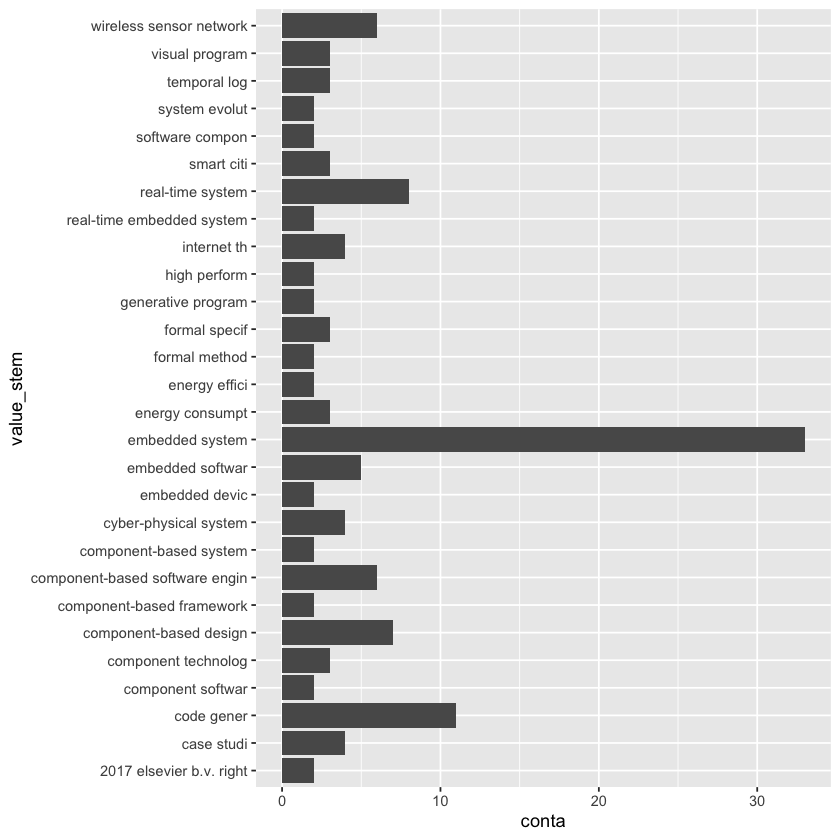

In [77]:
# Visualize 
# WARNING: after removal of unwanted
p <- selecionados %>% map_df(~ .x %>% 
                     group_by(value_stem) %>% 
                     summarise(conta=n())) %>%
filter(conta > 1) %>% # palavras que aparecem em pelo menos 30 documentos
ggplot(aes(x=value_stem, y = conta)) +
geom_bar(stat="identity") +
theme(axis.text.x=element_text(hjust = .5)) +
coord_flip()                             
p

## Text Generation
Condições:
* Todas as frases geradas têm que ser diferentes
* Por amostragem preferimos 4 frases para representar os grupos
* Conjunto de frases com frase nula é descartado

### Markov Chain Only
https://github.com/jsvine/markovify

In [79]:
markovify = import("markovify") # python

In [80]:
text_model = markovify$Text(gsub("'", " ", selecionados[[1]]$fog))

In [86]:
# group 'embedded system'
selecionados[[1]]$fog

[1] "Software Requirement Specification Based on a Gray Box for EmbeddedSystems: A Case Study of a Mobile Phone Camera Sensor Controller One of the most widely used models for specifying functionalrequirements is a use case model. The viewpoint of the use case modelthat views a system as a black box focuses on descriptions of externalinteractions between the system and related environments. However, forembedded systems that do not disclose most implementation logics outsidethe system, black box-based use case models may experience the drawbackthat considerable information that must be defined for systemdevelopments is omitted. To solve this shortcoming, several studies havebeen proposed on the use of kind of white box technique in which thedynamic behaviors of embedded systems are defined first using a statediagram and the results are reflected in the requirement specifications.However, white box-based modeling has not been widely adopted bydevelopers due to tasks that require a lot of time in the requirementanalysis phase in the initial phase of the software development lifecycle. This study proposes a gray box-based requirement specificationmethod as a trade-off between two contradictory elements (the amount ofinformation required to develop an embedded system and the cost of theeffort required during the requirement analysis phase) in terms of thetwo approaches, the black and the white box-based models. The proposedmethod suggests that an appropriate depth level of embedded systemmodeling is required to define the requirements. This study alsoproposes a mechanism that automatically generates an applicationprogramming interface for each component based on the created model. Theproposed method was applied to the development of a camera sensorcontroller in a mobile phone, and the case results proved thefeasibility of the method through discussion of the application results. embedded system; automatic requirement specifications; state model;camera sensor"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Analysis of an Intelligent Graphical Tutoring System Using the Internetof Things (IoT) to Develop the Competency of Embedded Systems The objectives of this research are to analyse and assess an intelligentgraphical tutoring system using the internet of things (IoT) to developthe efficiency of embedded systems. The research findings suggest thatan intelligent system is composed of six modules: 1) student, 2)graphical tutoring, 3) expert, 4) knowledge, 5) evaluation and 6) userinterface. The result of a composition assessment performed by expertsindicates that the overall results are at a high level. The systemsuitability scored the highest level which can be applied to real lifesituations. Intelligent tutoring systems; interne

In [82]:
# Generate 4 sentences
# Extractive method
for(i in 1:4){ 
print(text_model$make_sentence())
}

[1] "The first level deals withadditions-removals of Function Blocks to-from the system and thesystem ensures the assumptions of the execution environment, and a Case Study of a standard drive operating with different resource constraints."
[1] "The components are considered correct given that theenvironment satisfies certain properties imposed by the environment andthe guarantees satisfied by the environment andthe guarantees satisfied by the application requirements, the set of proof obligations."
[1] "BALBOA: A component-based design environment for system models This paper presents an architectural styletogether with its visual editor and domain-specific analysis tools, anda code generator."
[1] "These new features needto be considered as early as possible in the domain knowledge and experience of thearchitect."


### Markov Chain With Spacy (named entities)

In [87]:
py_run_string("
import markovify
import re
import spacy

nlp = spacy.load('en_core_web_sm')

class POSifiedText(markovify.Text):
    def word_split(self, sentence):
        return ['::'.join((word.orth_, word.pos_)) for word in nlp(sentence)]

    def word_join(self, words):
        sentence = ' '.join(word.split('::')[0] for word in words)
        return sentence
")

In [88]:
# Generate 4 sentences
# group 'embedded system'
text_model1 = py$POSifiedText(gsub("'", " ", selecionados[[1]]$fog))

In [89]:
# Extractive method
for(i in 1:4){
print(text_model1$make_sentence())
}

[1] "Ourinitial results show that model - based programming has been designed and used in classes ."
[1] "Themethodology verifies the correctness of the limited resources available on the created model ."
[1] "The approach is evaluated for anexample from the system and thesystem ensures the assumptions of the models ."
[1] "Automatic synthesis of communication and concurrency of the glue logic inserted betweenthe components and the third deals with updates of compositions of blocks in the roboticscurriculum in their junior and senior years , a component - based component system for component - based use case models may experience the drawbackthat considerable information that transit on thesepaths reach their destination at independent times ."
